<a href="https://colab.research.google.com/github/JosephDonoso/ADA-Informes/blob/main/Informe_%C3%81rbol_binario_de_b%C3%BAsqueda_%C3%B3ptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Informe del árbol binario de búsqueda óptimo**

## **1. Problema: Árbol binario de búsqueda óptimo**
>Dado una serie de valores, que representan las distintas frecuencias con las que aparece una cierta clave, obtener el mínimo **costo esperado** para un árbol de búsqueda binario generable con tales claves.

**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: El mínimo **costo esperado** de búsqueda, es decir, que la cantidad de nodos visitados por búsqueda sea la mínima para algún árbol generable con las claves.

## **2. Árbol binario de búsqueda óptimo**

## **2.1. Descripción del algoritmo**

Entrando en contexto, llegamos a estos tipos de algoritmos dadas las siguientes problemáticas: Supongamos que estemos trabajando en crear un tipo de traductor de texto, es decir, que por cada palabra ingresada por el usuario, el programa entregué la traducción de la misma para el idioma indicado. Se podría implementar el programa utilizando un árbol binario de búsqueda, donde en el peor de los casos la complejidad será de $O(log(n))$, pero ¿Qué tan ineficiente se volvería si no utilizamos algún tipo de árbol autobalanceable?, es más, ¿Cuántos nodos innecesarios visitaríamos en cada búsqueda solo por no tener rigor en colocar las palabras menos buscadas al final del árbol y las más buscadas al principio?. Ahora que tenemos claro lo que intentamos conseguir, que por cada palabra buscada se le dedique el mínimo tiempo posible sabiendo que tan frecuente es su busqueda o si la traducción existe como tal, la verdadera pregunta es ¿Cómo conseguiríamos eso?. 

Podemos comenzar con una suposición de frecuencias para las palabras a traducir,
se construirá una tabla con todas las palabras existentes, su supuesto costo y no olvidar considerar la probabilidad de que la palabra buscada no exista, ya que en esos casos se recorre una rama completa del árbol sin dar con ninguna clave. Obtendremos una tabla como esta:

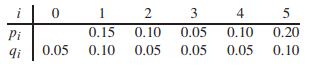

La variable $i$ corresponde al valor asociado a la palabra o **clave** $k_i$, recordemos que se busca construir un árbol binario lo que significa que en cada nodo del árbol debe cumplirse que su hijo izquierdo sea menor al nodo y su hijo derecho mayor. Entonces $P_i$ corresponderá a la frecuencia o **probabilidad** de que la palabra $k_i$ sea buscada, mientras que $q_i$ representa la probabilidad de buscar una clave $d_i$, las cuales no representan ninguna palabra, sino la ausencia de las mismas (búsquedas fallidas).

Con estos datos podremos graficar árboles binarios de búsqueda con distintas formas:
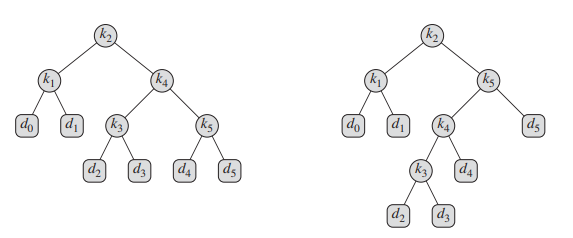

Pero como podemos identificar ¿Cuál de los dos árboles visita menos nodos en promedio por búsqueda?. Para ello nosotros podemos determinar el costo esperado de búsqueda de la siguiente forma: 

>$E[costo_{-}esperado] = \sum\limits_{i=1}^n high(k_i)·p_i + \sum\limits_{i=0}^n high(d_i)·q_i$

Donde $high()$ es una función que entrega la profundidad en la que se ubica el nodo en el árbol, considerando que la raiz del árbol tiene una profundidad de 1.

Ahora cabe averiguar como conseguir las distintas maneras en las se puede formar un árbol binario de búsqueda. Llegaremos a la siguiente subestructura óptima, ya que para abordar el problema original, se deben recrear y resolver todos los subproblemas que constituyen al principal:

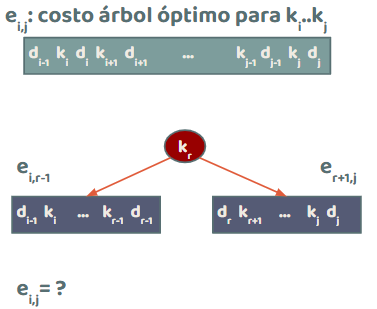

### **De forma recursiva**

Siguiendo la subestructura óptima, primeramente obtenemos una raiz para nuestra sección del árbol entre los elementos $k_i$ hasta $k_j$, la llamaremos $k_r$, donde $r$ estará en el intérvalo $i≤r≤j$. Calculamos el coste de todas las probabilidades para  las claves, aun sabiendo que solo $k_r$ será la raiz, porque el siguiente nivel comenzará más abajo y por este motivo se le suma ese valor no considerado en la siguiente recursión. Luego le sumamos el mínimo coste entregado al aplicar recursivamente el mismo proceso al intérvalo del árbol desde $i$ hasta $r-1$ y desde $r+1$ hasta $j$, sumando ambos.
>$OptCost(i,j) = \sum\limits_{k=i}^j p_k + min_{r = i}^{j}(OptCost(i,r-1)+OptCost(r+1,j))$

Ahora si podremos describir un algoritmo recursivo que pueda entregarnos una solución a nuestro problema inicial. Con este enfoque solo necesitamos calcular $OptCost(0, n-1)$ para encontrar el resultado. La idea de la fórmula anterior es simple, uno por uno probamos todos los nodos como raíz ($r$ varía de $i$ a $j$). Cuando hacemos que el nodo $k_r$ sea raíz, calculamos recursivamente el costo óptimo de $i$ a $r-1$ y de $r+1$ a $j$. 

Un ejemplo de lo que ocurre con una rama completa de recursiones del algoritmo:

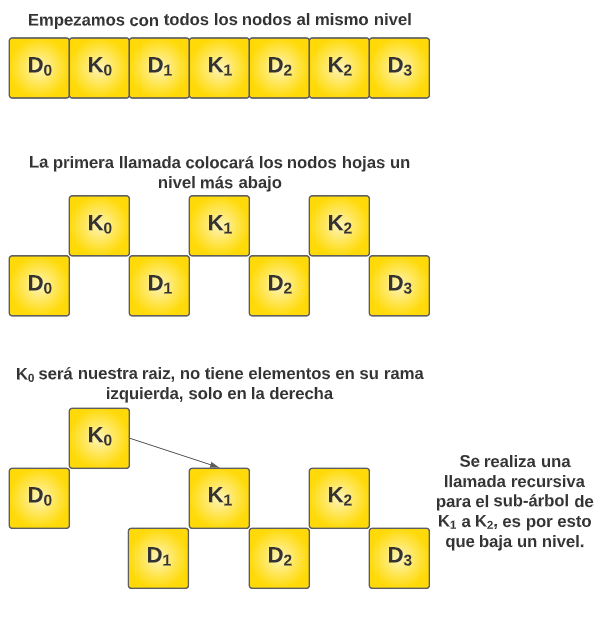

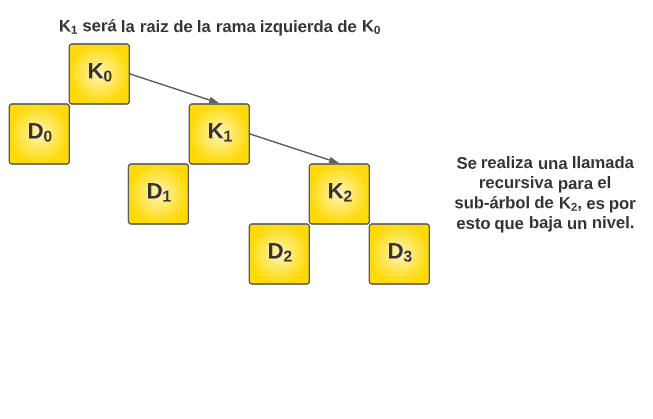

El problema con este método es la superposición de subproblemas. Como se puede observar en la siguiente imagen, los subproblemas se repiten varias veces, volviendo ineficiente al algoritmo con una complejidad exponencial.

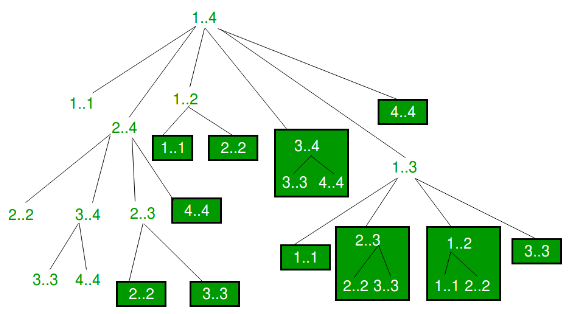

### **De forma iterativa aplicando Bottom-up**
Con un enfoque dinámico se soluciona el dilema de los subproblemas solapados, ya que se almacenan todas las soluciones a los subproblemas resueltos, para que cuando vuelvan a aparecer no se resuelvan más de una vez.

La estrategia a utilizar es la creación de por lo menos 2 matrices auxiliar solo para calcular el costo esperado y una tercera para obtener la raiz de ese árbol. La matriz $e[i][j]$, al igual que la matriz $w[i][j]$ varía con $i$ desde $1$ a $n+1$ ($n$ es el número de claves) y $j$ desde $0$ a $n$. La matriz de las raices $root[i][j]$ varían sus índices desde $1$ hasta $n$.

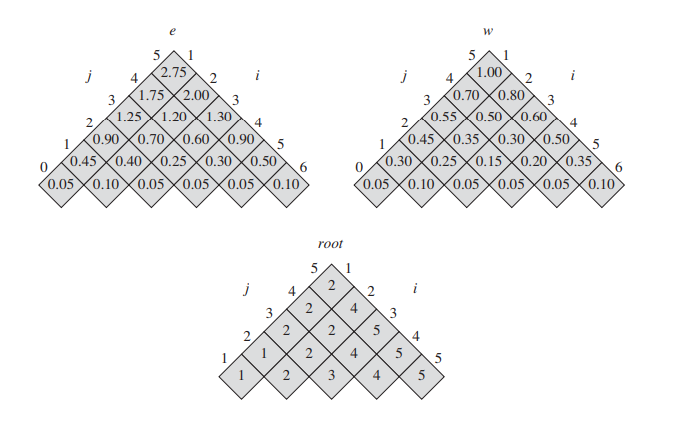

El primer paso es llenar la diagonal de la matriz de costos esperados y la matriz de la sumatoria de probabilidades de los nodos involucrados ( e  y  w respectivamente) con las frecuencias para las búsquedas fallidas. Los datos son obtenidos a partir de la tabla entregada párrafos anteriores:

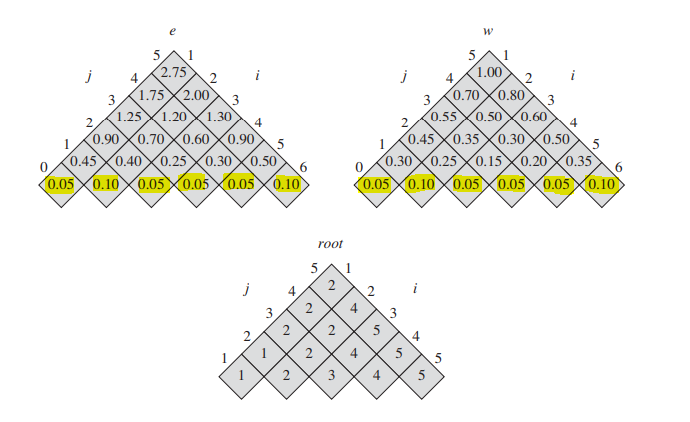

Luego comenzaremos calculando las contribuciones y costos para los casos de que el árbol tuviese tan solo una altura y cualquier clave fuése la raiz:

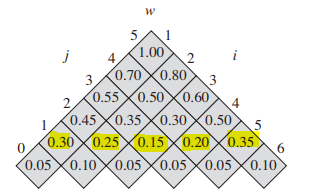

Se llega a este valor calculando la suma de de frecuencias anteriores $W[i][j-1]$ y la probabilidad de búsqueda para esta nueva raiz y el fallo $p_j + q_j$:

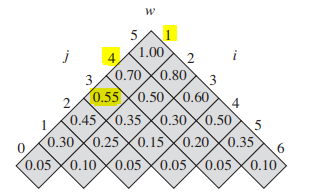

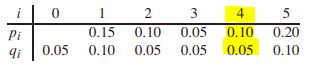

Es decir si calculamos la sumatoria de todas las probabilidades de los nodos para un árbol desde $k_1$ hasta $k_4$ (considerando las fallidas $d_i$), es decir $w[1][4]$, solo deberíamos sumar $w[1][3] + p_4 + q_4 = 0.70$, y así con todos los intervalos.

Ahora para calcular el costo esperado para cada forma de organizar el árbol, solo debemos evaluar las posibles maneras de asignar el nodo raiz. Es decir si tnemos tan solo 3 nodos, para organizar el tercero únicamente, evaluamos el costo mínimo entre colocar al tercero como raiz, como un nodo hoja que tiene de padre a la raiz, o como nodo hoja en una profundidad de 3 niveles. esto se realiza evaluando los costos esperados mínimos anteriores más la contribución del nivel:

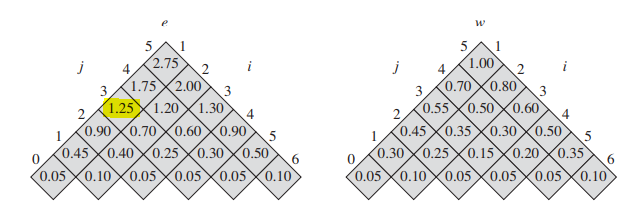

Siguiendo con el ejemplo, para $e[1][3]$, se evaluarán las distintas opciones para formar el árbol:

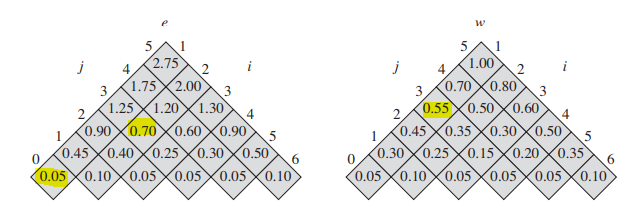

La primera es que el menor nodo se la raiz, entonces se le suma el coste mínimo para la rama izquierda conteniendo solo un nodo hoja y la derecha que contiene el subárbol de 2 nodos, $e[1][0]+e[2][3]$ más la contribución de todos los nodos involucrados $w[1][3]$ obteniendo un coste total de $1.30$

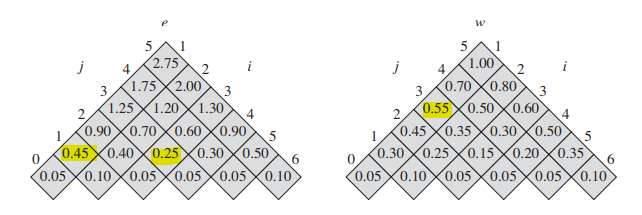

Con el nodo mediano como raiz, se obtiene un coste total de $1.25$

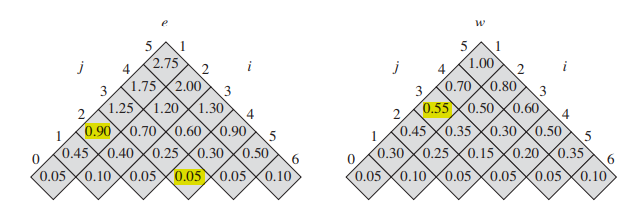

Y de la última forma con el nodo 3 como raiz se obtiene $1.50$

Como se puede observar, la segunda forma es la la que minimiza el costo esperado, con el nodo $k_2$ como raiz:

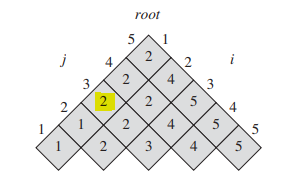

Para dar con la solución final de nuestro problema se obtiene $e[1][5]$ como el coste mínimo esperado para todo el árbol y $r[1][5]$ el nodo raiz que deberia tener nuestro árbol.

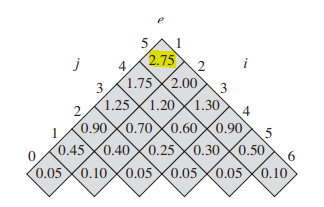

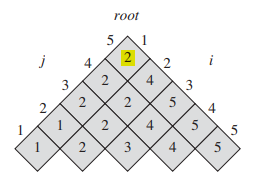

## **2.2. Implementación del algoritmo**

### **Instanciador de claves**

In [57]:
import pprint 
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import random
import numpy as np
import networkx as nx
from sys import maxsize

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(3)

In [2]:
print(keys)
print(p)
print(q)

[18, 34, 95]
[0.07145408403104116, 0.12594922219644444, 0.32401909466831985]
[0.06780588 0.12617888 0.20224685 0.082346  ]


### **Visualizador de árboles**

In [106]:
def visualize_bst(root, keys):
  Tree = nx.DiGraph()
  Tree.add_nodes_from([k for k in keys])

  n = len(keys)-1
  create_tree(Tree, keys, root, 0, n)
  pos = graphviz_layout(Tree, prog="dot")

  nx.draw(Tree,pos, with_labels=True, node_size=2000, font_color="white", font_size=10, font_weight="black", width  =1.0, edge_color ="green")

In [100]:
def create_tree(Tree, keys, root, i, j):
  if i == j: #Un intervalo solo con 1 nodo
    r = root[i][j]
    Tree.add_edge(keys[r], "D "+ str(keys[r])+ " " + str(r) )
    Tree.add_edge(keys[r], "D "+ str(keys[r]) + " " + str(r+1) )
    return

  #Calculo de la raiz actual y los intervalos
  r = root[i][j]
  i_izq = i
  j_izq = r-1
  i_der = r+1
  j_der = j

  if i_izq > j_izq: #El intervalo izquierdo y sus conexiones
    Tree.add_edge(keys[r],"D "+ str(keys[r]) + " " + str(r))
  else:
    r_izq = root[i_izq][j_izq]
    Tree.add_edge(keys[r],keys[r_izq])
    create_tree(Tree, keys, root, i_izq, j_izq)

  if i_der > j_der: #El intervalo derecho y sus conexiones
    Tree.add_edge(keys[r],"D "+ str(keys[r]) + " " + str(r+1))
  else:
    r_der = root[i_der][j_der]
    Tree.add_edge(keys[r],keys[r_der])
    create_tree(Tree, keys, root, i_der, j_der)
  


### **Variante recursiva**

In [47]:
def recursive_optimal_bst( p, q, i, j):
  # Casos base
  if j < i:     # No hay elementos en el arreglo
      return 0
  if i == j:     # 1 Solo elemento en el arreglo
      return p[i] + q[i] + q[i+1] #Baja un nivel de altura a ese
                                  #elemento y a sus nodos hojas
  suma_inicial = 0
  if j-i == len(p) - 1: #En la primera llamada al algoritmo se debe 
    for k in range(len(q)):#sumar todos los nodos hoja para dejarlos una
      suma_inicial += q[k] #altura más abajo
    
  fsum = Sum(p, q, i, j) + suma_inicial #Se suman todos los elementos para situarlos
                                        #en la altura correspondiente
    
  Min = -maxsize
  
  for r in range(i, j + 1): #Se posiciona cada nodo como raiz de su propio subárbol
      cost = (recursive_optimal_bst(p, q, i, r - 1) + #Se calcula recursivamente el 
              recursive_optimal_bst(p, q, r + 1, j)) #óptimo subárbol derecho e izquierdo
      if cost < Min:
          Min = cost #Se actualiza el mínimo con los costos obtenidos
    
  # Return minimum value
  return Min + fsum #se retornan

def optimalSearchTree(keys, p, q, n):
    return recursive_optimal_bst(p, q, 0, n - 1)
 
def Sum(p, q, i, j):#Suman todas las probabilidades
    s = 0
    for k in range(i, j + 1): 
      s += p[k]
    for k in range(i,j + 2):
      s += q[k] 
    return s

In [4]:
p = [1, 2, 3,7,6,4,3]
q = [1, 2, 3, 4,1,2,1,2]
n = len(p)
print("El mínimo costo esperado es de:",
        optimalSearchTree(keys, p, q, n))

El mínimo costo esperado es de: 121


### **Variante que implementa programación dinámica**

In [108]:
def optimal_bst(keys, p, q, n, visualizer = False ):
	#Inicializar matriz de costos,
	e = [([0] * (n+1)) for i in range(n+1)] 
	#la matriz con las probabilidades de nodos involucrados
	w = [([0] * (n+1)) for i in range(n+1)] 
	#y la matriz que guarda la raiz obtima para cada intervalo
	root = [([0] * n) for i in range(n)]

	#Inicializar con los costos sin nodos y solo la probabilidad de las hojas
	for i in range(n+1):
		e[i][i] = q[i]
		w[i][i] = q[i]

	#la variable "l" recorrerá los rangos de todos los intervalos
	for l in range(n+1):
		for i in range(n - l):
			j = i+l+1
			#se inicializa el costo esperado para el intervalo con un número alto
			e[i][j] = maxsize
			#se calcula las probabilidades del intervalo con la suma 
			#del intervalo anterior y la probailidad del siguiente nodo y hoja
			w[i][j] = round((w[i][j-1] + p[j-1] + q[j]) * 10000) / 10000

			#Se obtienen todas las posibles formas del árbol para el intervalo
			for r in range(i, j):
				#Se calcula el coste como la suma de los nodos involucrados más
				#La suma de las diferentes formas que podrá tener el árbol
				t = round((e[i][r] + e[r+1][j] + w[i][j]) * 10000) / 10000
				if t < e[i][j]: #Se actualiza el mínimo
					e[i][j] = t
					root[i-1][j-1] = r #Se guarda esa raiz

#Por la transposición, la primera fila de la matriz queda como la última
#Se bajan todas las filas y se coloca a la última en la primera para solucionarlo
	aux = root[n-1]
	for i in range(n-2,-1,-1):
		root[i+1] = root[i]
	root[0] = aux
	if visualizer:
		visualize_bst(root,keys)
	return e, root

#### Ejemplo 1:

In [86]:
keys = ["k1", "k2", "k3", "k4", "k5"]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(p)
print("Matriz de costos esperados:")
e, root = optimal_bst(keys, p, q, n)
pprint.pprint(e)
print("\nMatriz de raices:")
for i in root:
  print(i)
print("\nEl mínimo costo esperado es de:", e[0][n])

Matriz de costos esperados:
[[0.05, 0.45, 0.9, 1.25, 1.75, 2.75],
 [0, 0.1, 0.4, 0.7, 1.2, 2.0],
 [0, 0, 0.05, 0.25, 0.6, 1.3],
 [0, 0, 0, 0.05, 0.3, 0.9],
 [0, 0, 0, 0, 0.05, 0.5],
 [0, 0, 0, 0, 0, 0.1]]

Matriz de raices:
[0, 0, 1, 1, 1]
[0, 1, 1, 1, 3]
[0, 0, 2, 3, 4]
[0, 0, 0, 3, 4]
[0, 0, 0, 0, 4]

El mínimo costo esperado es de: 2.75


#### Ejemplo 2:

Matriz de raices:
[0, 1, 2]
[0, 1, 2]
[0, 0, 2]

El mínimo costo esperado es de: 39.0


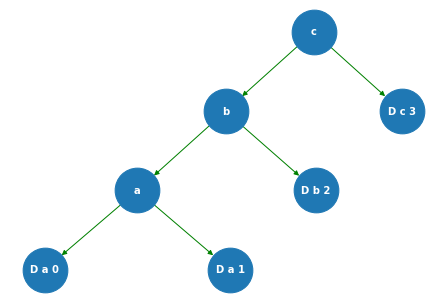

In [110]:
keys = ["a", "b", "c"]
p = [1, 2, 3]
q = [1, 2, 3, 4]
n = len(p)
e, root = optimal_bst(keys, p, q, n)
print("Matriz de raices:")
for i in root:
  print(i)
print("\nEl mínimo costo esperado es de:", e[0][n])

visualize_bst(root,keys)

## **2.3. Opción visualizer**

In [104]:
keys, p, q = optimal_bst_instance_generator(5)
print(keys)
print(p)
print(q)
n = len(keys)

[10, 29, 64, 83, 91]
[0.153072567189697, 0.09321087674046817, 0.06454508109597458, 0.0394237814548247, 0.05094433938842058]
[0.13550736 0.12431939 0.07245311 0.13911776 0.11296565 0.01444009]


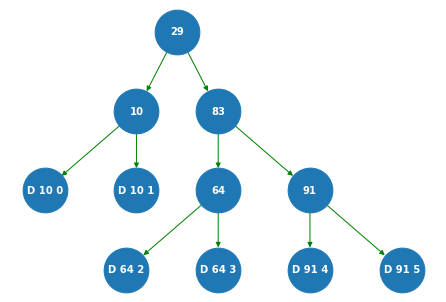

In [109]:
e, root = optimal_bst(keys, p, q, n, True)

## **3. Tiempo de ejecución**

### **Variante recursiva**



#### **Teorema**
*El algoritmo **recursive_optimal_bst** tiene un tiempo de ejecución $O(2^n)$.*

#### **Función recursiva**
Se define una función recursiva que modele la división del problema original $T(n)$:
>$T(n) = ∑_{j=0}^{n-1}T(j) + 1$

#### **Método de sustitución**
Ahora, usando el método de sustitución, probaremos que $O(2^n)$ es efectivamente una cota superior asintótica para $T(n)$.

Debemos probar que $T(n) \leq c · 2^n$, para algún valor de $c>0$.
Para ello, asumimos que esto es cierto (inducción) y **sustituimos en la recursión**, los valores de $T(n)$ por $c · 2^n$:

>$T(n) \leq ∑_{j=0}^{n-1}c · 2^j + 1 \leq c · 2^n$
>
>$T(n) \leq c · (2^n-1) + 1 \leq c · 2^n$
>
>$T(n) \leq c · 2^n - c + 1 \leq c · 2^n$
>
>$-c \leq -1$
>
>$c ≥ 1$ 

Por lo que efectivamente $c⋅2^n=O(2^n)$ es una cota asintótica superior para el algoritmo.

### **Variante que aplica Bottom-up**

#### **Teorema**
*El algoritmo **optimal_bst** tiene un tiempo de ejecución $O(n^3)$.*

Para calcular el tiempo de ejecución del algoritmo se utilizará la siguiente fórmula obtenida del libro Algorithms Illuminated (Parte 4, página 107):

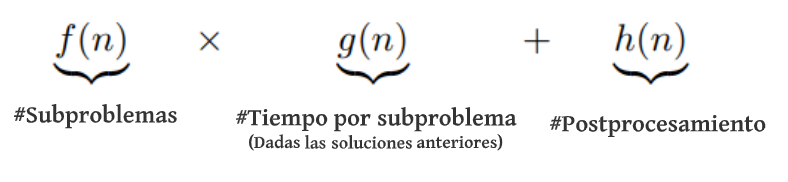

Entonces para obtener el tiempo de ejecución del algoritmo $T(n)$, primeramente debemos calcular las 3 funciones anteriores:

1.   $f(n)$: Se refiere a la cantidad de subproblemas en resolver. Para cada tamaño de intervalo posible, resulta en una cantidad de $n$ tamaño de intervalos(Sin considerar cuando no existen nodos), se calculan las combinatorias para escoger nodos con ese tamaño de intervalo (con $i$ menor o igual a $j$ siempre), que en máxima medida podrá ser.

2.   $g(n)$: Se refiere al tiempo estimado por resolver cada subproblema, este varía en función del tamaño del intervalo del subproblema actual a resolver. Se calcula como los distintos costos generables con una cierta combinación de nodos. Ejemplo, para 2 nodos $k_3$ y $k_4$, puede existir un costo que es dejando al $k_3$ como raiz y otro dejando a $k_4$ como raiz.

3.   $h(n)$: Se refiere al tiempo de ejecución en procesar la solución. En este caso es despreciable el valor de esta función, ya que buscamos una cota superior para el algoritmo y lo calculado es de orden $O(1)$ en instrucciones para almacenar la solución dinámicamente.

Reemplazando obtendremos:
>$T(n) = \sum_{l=1}^{n}\sum_{i=1}^{l}\sum_{r=1}^{i}·c$
>
>$T(n) = c·\sum_{l=1}^{n}\sum_{i=1}^{l} i$
>
>$T(n) = c·\sum_{l=1}^{n}\frac{l^2+l}{2}$
>
>$T(n) = c·(\sum_{l=1}^{n}l^2 + \sum_{l=1}^{n}l)·\frac{1}{2}$
>
>$T(n) = c·(\frac{n(n+1)(2n+1)}{6} + \frac{n(n+1)}{2})·\frac{1}{2}$
>
>$T(n) = c·(\frac{2n^3+3n^2+n}{6}+\frac{n^2+n}{2})·\frac{1}{2}$
>
>$T(n) = O(n^3)$





#### **Complejidad espacial**
*El algoritmo **optimal_bst** tiene una complejidad espacial $O(n^2)$.*

Se obtiene el orden $O(n^2)$ en base a la cantidad de subproblemas anteriores utilizados para resolver el subproblema actual. Se necesita de la creación de 3 matrices para dar con el resultado del costo esperado para el árbol óptimo, las tres matrices son de orden $O(n^2)$ a esto se debe su complejidad espacial$.

Estas son las 3 matrices:

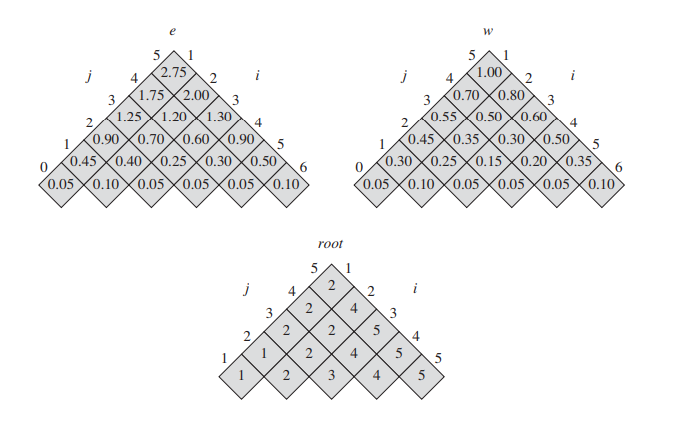